In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame, YouTubeVideo
from ipywidgets import interact,fixed
import pandas as pd
from numpy import cos,sin,pi,tan,log,exp,sqrt,array,linspace,arange
from mpl_toolkits import mplot3d
from numpy.linalg import norm

from ipykernel.pylab.backend_inline import flush_figures

%matplotlib inline

plt.rcParams['figure.figsize'] = [8.0, 8.0]


# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('default')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

# plt.rcParams.update({
#     "text.usetex": True,
# #     "font.family": "serif",
# })
# plt.style.use('Solarize_Light2')

$\renewcommand{\vec}{\mathbf}$

#### Example

Compute:

  1. $\displaystyle \frac{\partial}{\partial x} \left( x^2y - \sin(x-2y) \right)$

$$ = 2xy - \cos(x - 2y)$$

  2. $\displaystyle \frac{\partial}{\partial y} \left( x^2y - \sin(x-2y) \right)$

$$ = x^2 +2 \cos(x - 2y)$$

  3. $\displaystyle \frac{\partial}{\partial z} \left( \frac{z^2 \tan^{-1}(\sqrt{x^2+1})}{\cosh(xy)} \right)$

$$\displaystyle =  2z\left( \frac{ \tan^{-1}(\sqrt{x^2+1})}{\cosh(xy)} \right)$$

## Mixed partials

A quantity like $\frac{\partial^2 f}{\partial x \partial y}$ is a little harder to wrap ones head around. 

Compute all mixed partials of the following funtions:
  
  1. $f(x,y) = xy^3 - y \sin x$

$$f_x = y^3 - y \cos x \qquad f_y = 3xy^2 - \sin x$$

$$f_{xy} = 3y^2 - \cos x = f_{yx} x$$


  2. $r(x,t) = \frac{x}{x+t}$

$$r_x = \frac{t}{(x + t)^2} \qquad r_t = \frac{-x}{(x + t)^2}$$

$$r_{xt} = \frac{(x+t)^2 - 2t(x+t)}{(x + t)^4} = \frac{x-t}{(x + t)^3} = r_{tx}$$


  3. $u(p,q) = e^{-p\sqrt{q}}$   

$$u_p = -\sqrt{q} e^{-p\sqrt{q}} \qquad u_q = -\frac{p}{2\sqrt{q}}e^{-p\sqrt{q}}$$

$$u_{pq} = e^{-p\sqrt{q}} \left( \frac{p}{2} - \frac{1}{2\sqrt{q}}\right) = u_{qp} $$


### Example

Below is a contour plot of a function $f(x,y)$. Estimate the partial derivatives $\frac{\partial f}{\partial x}$ and $\frac{\partial f}{\partial y}$ at each labeled point. 

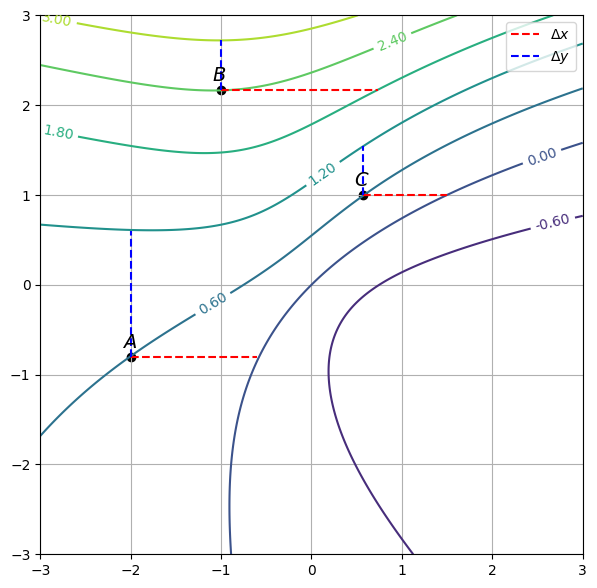

In [25]:
X = Y = np.linspace(-3,3,400)
X,Y = np.meshgrid(X,Y)
Z = (1.5**Y*Y - X) / sqrt(X**2 + Y**2 + 1)
plt.figure(figsize=(7,7))
cs = plt.contour(X,Y,Z)
pts=np.column_stack([[-2,-.8],[-1,2.17],[.57,1]])
plt.scatter(pts[0],pts[1],color='k')
plt.plot([-2,-.6],[-.8,-.8], color='r', ls='--',label=r"$\Delta x$")
plt.plot([.57, 1.5], [1,1], color='r', ls='--')
plt.plot([-1,.74],[2.17, 2.17], color='r', ls='--')

plt.plot([-2,-2],[-.8,.6], color='b', ls='--',label=r"$\Delta y$")
plt.plot([.57, .57], [1,1.55], color='b', ls='--')
plt.plot([-1,-1],[2.17, 2.73], color='b', ls='--')

for i,ch in enumerate("ABC"):
    plt.text(pts[0,i]-.1,pts[1,i]+.1,"${}$".format(ch),fontsize=14)
plt.grid(True)
plt.legend()
plt.clabel(cs,fmt="%1.2f");

### Solution

We estimate partial derivatives with difference quotients. For instance, $$\frac{\partial f}{\partial x} \approx \frac{\Delta f}{\Delta x}$$ where we connect the point in question with a nearby contour via a line **in the $x$-direction**  to determine $\Delta f$, the change in output. The displacement in that direction is thus the change in input $\Delta x$.

We estimate:
\begin{align*}
\frac{\partial f}{\partial x}\bigg\rvert_{A} &\approx \frac{-0.6}{1.4} = -.43 \qquad \qquad &\frac{\partial f}{\partial y}\bigg\rvert_{A} &\approx \frac{0.6}{1.4} = .43 \\
\frac{\partial f}{\partial x}\bigg\rvert_{B} &\approx \frac{-0.6}{1.7} = -.35 \qquad \qquad &\frac{\partial f}{\partial y}\bigg\rvert_{B} &\approx \frac{0.6}{.6} = 1 \\
\frac{\partial f}{\partial x}\bigg\rvert_{C} &\approx \frac{-0.6}{.8} = -.75 \qquad \qquad &\frac{\partial f}{\partial y}\bigg\rvert_{C} &\approx \frac{0.6}{.5} = 1.167 \\
\end{align*}

These estimates are rather crude though. To improve them we need more contours and/or averaging changes in both the positive and negative direction, but this is a start. 

$f_x(B)$ is particularly poor. Can you see why?

Use the following to improve estimates.

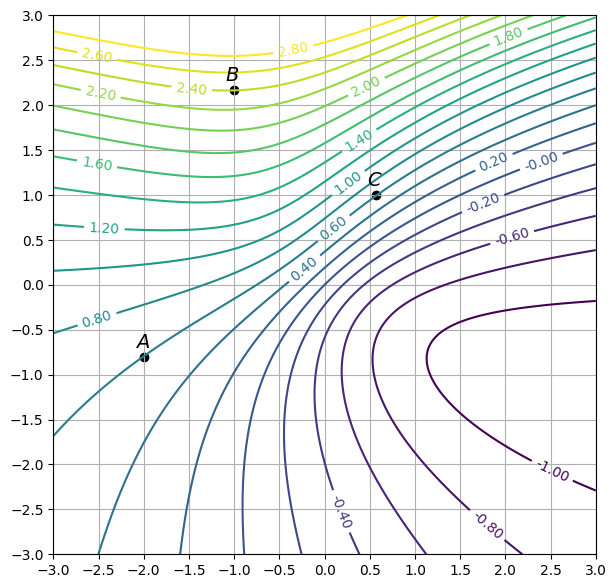

In [5]:
X = Y = np.linspace(-3,3,150)
X,Y = np.meshgrid(X,Y)
Z = (1.5**Y*Y - X) / sqrt(X**2 + Y**2 + 1)
plt.figure(figsize=(7,7))
pts=np.column_stack([[-2,-.8],[-1,2.17],[.57,1]])
plt.grid(True,'both')
plt.xticks(np.arange(-3,4,.5))
plt.yticks(np.arange(-3,4,.5))

for i,ch in enumerate("ABC"):
    plt.text(pts[0,i]-.1,pts[1,i]+.1,"${}$".format(ch),fontsize=14)
cs = plt.contour(X,Y,Z,levels=np.arange(-1,3,.2))
plt.scatter(pts[0],pts[1],color='k')
plt.clabel(cs,fmt="%1.2f");